<a href="https://colab.research.google.com/github/diogokelmer/MVP_Trabalho/blob/main/MVP_Diogo_Kelmer_4052025000826.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Diogo Kelmer Mendes Ribeiro

**Matrícula:** 4052025000826

**Dataset:** [Futbr Dataset - Github](https://github.com/diogokelmer/MVP_Trabalho/blob/main/BRA.csv)

[Futbr Dataset - kaggle](https://www.kaggle.com/datasets/saulocampos/estatsticas-do-campeonado-brasileiro?resource=download)

 **------**

# Descrição do Problema

Este trabalho tem como base um conjunto de dados com informações de partidas da Série A do Campeonato Brasileiro, incluindo dados dos times que jogaram, placar final e estatísticas de apostas, como as probabilidades (odd's) atribuídas a vitória do mandante, empate ou vitória do visitante antes do início dos jogos.

## Hipóteses do Problema

As hipóteses levantadas foram:

a) As odd's oferecidas pelas casas de apostas refletem, de forma geral, a tendência do resultado final da partida.

b) Jogos com odd's muito diferentes entre os times indicam um favoritismo mais claro e, possivelmente, um resultado mais previsível.

c) Times mandantes costumam ter odd's menores para vitória, o que pode indicar uma vantagem histórica jogando em casa.

d) O Flamengo é o time que mais converteu o favoritismo, jogando em casa, em vitórias.

## Tipo de Problema

O tipo de problema que estou tratando aqui é uma análise exploratória de dados com enfoque descritivo. Como os resultados de cada partida já estão registrados no dataset (vitória do mandante, empate ou vitória do visitante), o objetivo é investigar padrões, frequências e possíveis relações entre variáveis como as odds fornecidas pelas casas de apostas, o mando de campo e a quantidade de gols.

## Seleção de Dados

Escolhi o dataset Futbr, pois ele reúne dados de partidas da Série A do Campeonato Brasileiro, incluindo nomes dos times, placar final, data do jogo e odd's fornecidas por casas de apostas, completo para o tema que busco analisar.

Ainda, fiz essa opção por ser uma base pública, bem estruturada e permitir uma análise interessante das hipóteses elencadas acima.

## Atributos do Dataset

O dataset Futbr contém as seguintes colunas:

- Country: Pais onde o campeonato foi disputado.
- League: Nome da liga (neste caso, Série A do Campeonato Brasileiro).
- Season: Temporada do campeonato (ano).
- Date: Data da partida.
- Time: Horário em que o jogo foi realizado.
- Home: Nome do time mandante.
- Away: Nome do time visitante.
- HG: Gols marcados pelo time da casa.
- AG: Gols marcados pelo time visitante.
- Res: Resultado da partida (H = vitória do mandante, D = empate, A = vitória do visitante).
- PH, PD, PA: Probabilidades fornecidas pela casa de apostas Pinnacle para vitória do mandante, empate e vitória do visitante, respectivamente.
- MaxH, MaxD, MaxA: Maiores probabilidades oferecidas por diferentes casas de apostas (dados da OddsPortal) para cada resultado possível.
- AvgH, AvgD, AvgA: Probabilidades médias, também da OddsPortal, para vitória do mandante, empate e vitória do visitante.

# Importação das Bibliotecas Necessárias e Carga de Dados

Para começar, foram importadas as principais bibliotecas utilizadas em análises de dados com Python: pandas para manipulação dos dados, matplotlib.pyplot e seaborn para criação de gráficos e visualizações.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [41]:
url_dados = 'https://raw.githubusercontent.com/diogokelmer/MVP_Trabalho/main/BRA.csv'
df = pd.read_csv(url_dados)


In [42]:
df.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


Nas primeiras linhas do dataset, o que chama atenção é que, além dos dados básicos da partida, como times, placar, data e horário, o arquivo traz várias colunas relacionadas às probabilidades fornecidas por casas de apostas, como PH, PD, PA, AvgH, AvgD, AvgA, entre outras.

Outro ponto relevante é que os valores da coluna "Res", que indica o resultado do jogo, estão representados por letras. H indica vitória do mandante, significando "Home", ou o time que joga "em casa", A indica vitória do visitante, significando "Away", ou o time que joga "fora de casa" e D representa empate, do inglês "Draw".

# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Futbr, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset Iris possui 4170 instâncias (observações), com 19 colunas. Cada uma representa ou uma característica da partida disputada ou uma probabilidade relacionada à partida. Desta forma, possui tanto atributos númericos como PD, AVGD etc. Como atributos categóricos, como o país e a temporada em que a partida foi disputada.

In [43]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 4170

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4170 entries, 0 to 4169
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  4170 non-null   object 
 1   League   4170 non-null   object 
 2   Season   4170 non-null   int64  
 3   Date     4170 non-null   object 
 4   Time     4170 non-null   object 
 5   Home     4170 non-null   object 
 6   Away     4170 non-null   object 
 7   HG       4169 non-null   float64
 8   AG       4169 non-null   float64
 9   Res      4169 non-null   object 
 10  PH       4169 non-null   float64
 11  PD       4169 non-null   float64
 12  PA       4169 non-null   float64
 13  MaxH     4170 non-null   float64
 14  MaxD     4170 non-null   float64
 15  MaxA     4170 non-null   float64
 16  AvgH     4170 non-null   float64
 17  AvgD     4170 non-null   float64
 18  AvgA     4170 non-null   float64
dtypes: float64(11), int64(1), object(7)


## Estatísticas Descritivas


Verificando as estatísticas descritivas abaixo, algumas tendências importantes já começam a aparecer como em gols marcados, percebemos que os times mandantes têm uma média de 1,41 gols por partida, enquanto os visitantes marcam, em média, 0,95 e isso talvez já reforce uma surpertição dentro do mundo do futebol que jogar em casa costuma ser uma vantagem e acaba sendo considerado favorito nas odds, mas verificaremos isso mais afundo quando entrarmos nas hipóteses, mas já olhando por cima sobre as odds oferecidas pelas casas de apostas como a pinnacle, vemos que a média da odd para vitória do mandante é 2,30 consideravelmente menor que a média para vitória do visitante, que é 4,71. O empate fica entre essas duas, com média de 3,65. Essa diferença pode mostrar que, na média, as casas de apostas também tendem a considerar o time da casa como favorito.

Além disso, ao observarmos as odds máximas e médias oferecidas por diversas casas (como as colunas MaxH, MaxA, AvgH, AvgA), percebemos que temod jogos em que as odds para vitória do visitante chegam a valores muito altos e isso pode indicar partidas com grande desequilíbrio, onde o favoritismo de um dos times é muito claro. Esse cenário se conecta diretamente à hipótese de que odds muito diferentes podem sugerir resultados mais previsíveis, mas verificaremos mais afundo quando entrarmos na hipótese.

E isso também pode ser verificado na média abaixo e no desvio padrão, ja que lá podemos ver que há uma oscilação considerável em algumas variáveis como o desvio padrão das odds de vitória do visitante (PA) de 2.53, indicando que há uma grande dispersão nesses valores o que pode estar relacionado a partidas com favoritismo muito claro do time da casa. O mesmo vale para MaxA e AvgA que também têm desvios altos de 2.81 e 2.17, reforçando a presença de outliers.

In [44]:
df.describe()

,Season,HG,AG,PH,PD,PA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA
count,4170.000000,4169.000000,4169.000000,4169.000000,4169.000000,4169.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000,4170.000000
mean,2016.988010,1.413049,0.946030,2.308695,3.655570,4.716887,2.389823,3.760086,4.971638,2.231590,3.488293,4.347379
std,3.156941,1.158372,0.967422,0.964418,0.664663,2.535481,1.077162,0.690743,2.819727,0.898657,0.576835,2.170512
min,2012.000000,0.000000,0.000000,1.080000,2.540000,1.150000,1.090000,2.630000,0.000000,1.070000,2.510000,1.150000
25%,2014.000000,1.000000,0.000000,1.690000,3.260000,2.980000,1.730000,3.340000,3.060000,1.650000,3.150000,2.850000
50%,2017.000000,1.000000,1.000000,2.080000,3.450000,4.020000,2.150000,3.540000,4.150000,2.030000,3.300000,3.735000
75%,2020.000000,2.000000,1.000000,2.620000,3.860000,5.780000,2.700000,3.970000,6.100000,2.530000,3.660000,5.330000
max,2022.000000,6.000000,6.000000,17.680000,12.250000,29.580000,29.000000,12.500000,36.000000,20.230000,10.820000,26.580000


### Média

In [45]:
df.describe().loc['mean']

,mean
Season,2016.988010
HG,1.413049
AG,0.946030
PH,2.308695
PD,3.655570
PA,4.716887
MaxH,2.389823
MaxD,3.760086
MaxA,4.971638
AvgH,2.231590


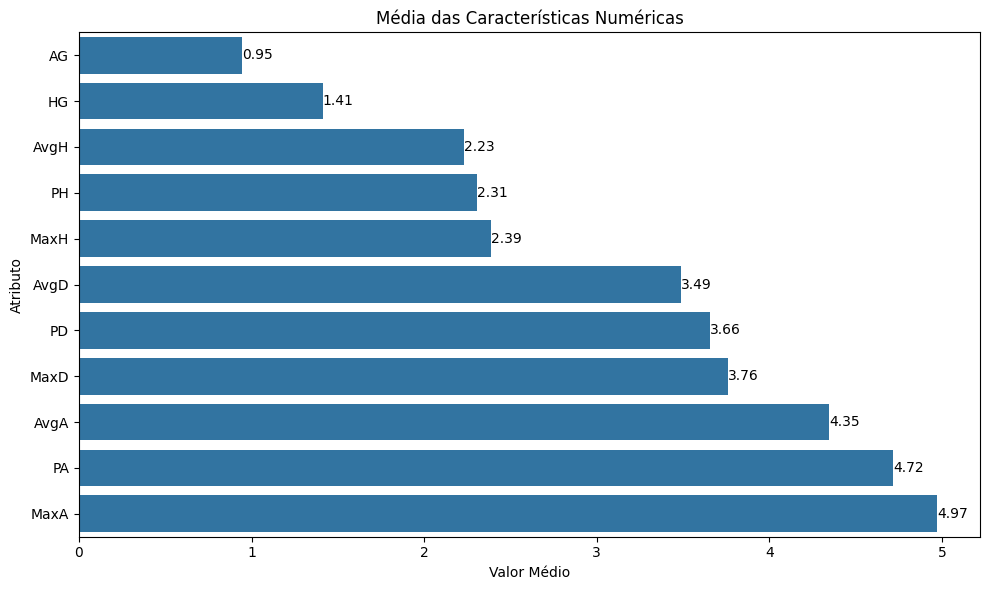

In [46]:
means = df.describe().loc['mean'].sort_values()
# Removi a coluna 'Season' devido à distância entre o tamanho do número do ano e os demias
means = means.drop('Season')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=means.values, y=means.index)
for i, value in enumerate(means.values):
    ax.text(value, i, f'{value:.2f}', va='center')
plt.title('Média das Características Numéricas')
plt.xlabel('Valor Médio')
plt.ylabel('Atributo')
plt.tight_layout()
plt.show()

As odds médias e máximas para vitoria do visitante (AvgA, PA, MaxA) aparecem no topo, com os maiores valores, o que é esperado, já que o visitante geralmente entra como azarão nas partidas. Já os menores valores estão relacionados aos gols marcados (AG, HG) e às odd's médias para vitória do mandante (AvgH), o que reflete uma tendência de favoritismo mais comum dos times da casa.

### Desvio Padrão


In [47]:
df.describe().loc['std']

,std
Season,3.156941
HG,1.158372
AG,0.967422
PH,0.964418
PD,0.664663
PA,2.535481
MaxH,1.077162
MaxD,0.690743
MaxA,2.819727
AvgH,0.898657


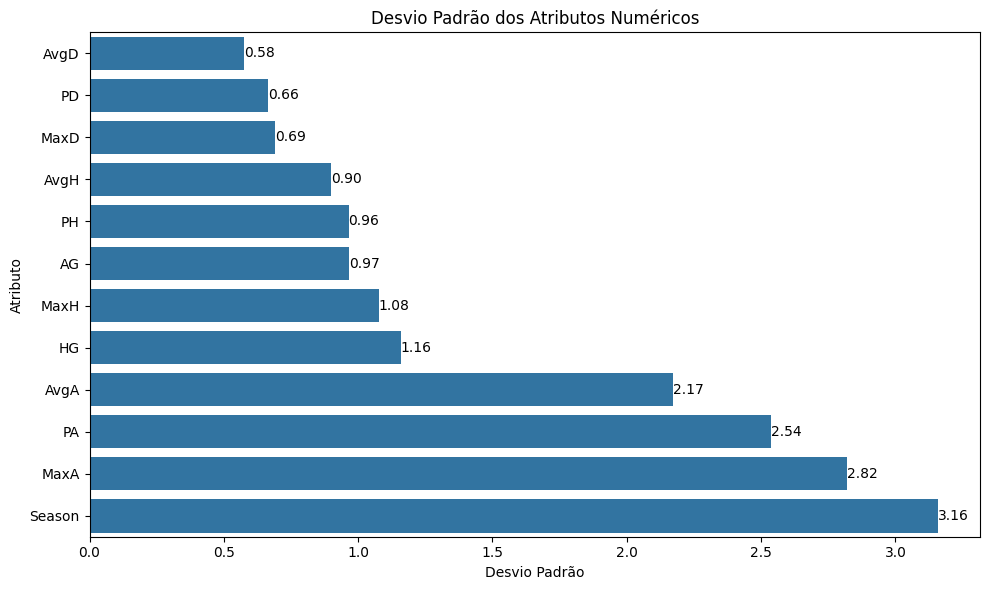

In [48]:
stds = df.describe().loc['std'].sort_values()
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=stds.values, y=stds.index)
for i, value in enumerate(stds.values):
    ax.text(value, i, f'{value:,.2f}', va='center')
plt.title('Desvio Padrão dos Atributos Numéricos')
plt.xlabel('Desvio Padrão')
plt.ylabel('Atributo')
plt.tight_layout()
plt.show()

Observa-se que os atributos com maior variação são MaxA, PA e AvgA, o que indica uma grande dispersão nas odds para vitória do visitante. Já as odds de empate (AvgD, PD) apresentaram menor variação, o que sugere uma maior consistência entre os valores registrados para esse tipo de resultado. Esses dados ajudam a entender quais variáveis são mais estáveis e quais podem ter comportamento mais volátil ao longo das partidas.

## Histograma

### *Odd para Vitória do Mandante (PH)h*

Verificando o cenário abaixo temos que maior parte das odds está concentrada entre 1 e 2.5, o que indica que, na maioria dos jogos, o time da casa é visto como favorito ou ao menos competitivo pelas casas de apostas. A curva é assimétrica à direita, o que significa que existem alguns jogos em que a vitória do mandante era considerada muito improvável (odds acima de 5 por exemplo), mas são casos raros. Então mostra um favotitismo hitórico dos mandantes.

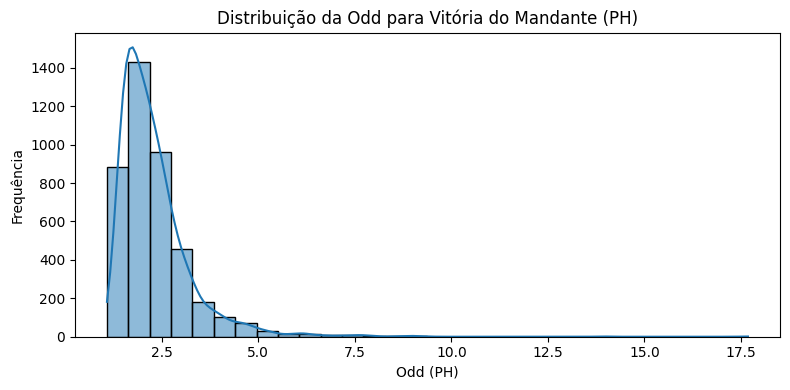

In [49]:
plt.figure(figsize=(8, 4))
sns.histplot(df['PH'], bins=30, kde=True)
plt.title('Distribuição da Odd para Vitória do Mandante (PH)')
plt.xlabel('Odd (PH)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

### *Distribuição da Odd para Vitória do Visitante (PA)*

Enquanto no grafico mandante acina a maioria das odds está concentrada entre 1 e 3, esse histograma abaixo mostra bem claro que a maioria das odds para vitória do visitante (PA) a maior concentração de odds fica entre 3.0 e 6.0, mas existem muitos jogos com odds ainda maiores, chegando até quase 30. Isso reforça a nossa ulttima hipótese de que times visitantes costumam ser menos favoritos, já que as odds mais altas indicam menor probabilidade atribuída à vitória. A curva deslocada para a direita, com picos em valores maiores que os da odd do mandante, sugere que as casas de apostas enxergam menos chances de vitória para os visitantes, o que também dialoga com a ideia da vantagem histórica de jogar em casa.

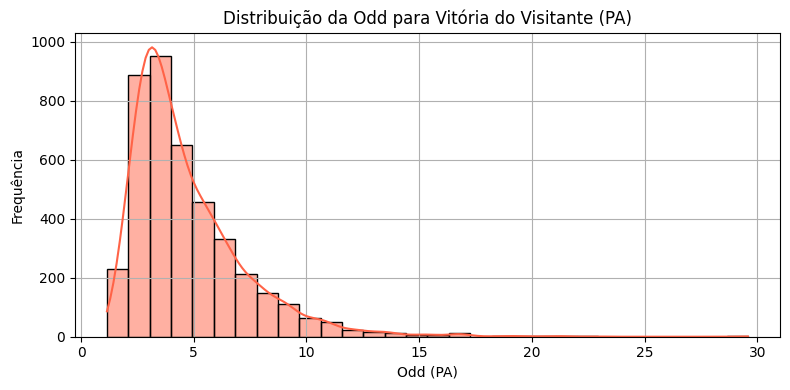

In [50]:
plt.figure(figsize=(8, 4))
sns.histplot(df['PA'], bins=30, kde=True, color='tomato')
plt.title('Distribuição da Odd para Vitória do Visitante (PA)')
plt.xlabel('Odd (PA)')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pré-Processamento de Dados

## Tratamento de Valores Nulos

Identifiquei que pouquíssimas colunas continham valores nulos, especialmente nas variáveis relacionadas às odds o que é esperado, considerando que nem todas as partidas podem ter odds registradas por todas as casas de apostas, mas a quantidade de nulos não afetaria nossa análise justamente por serem poucos casos,mas para evitar problemas optei por remover as linhas com valores ausentes antes de seguir para as próximas etapas.

In [51]:
print("Valores nulos no dataset Futbr:")
df.isnull().sum()

Valores nulos no dataset Futbr:


,0
Country,0
League,0
Season,0
Date,0
Time,0
Home,0
Away,0
HG,1
AG,1
Res,1


In [52]:
df = df.dropna()
df.isnull().sum() #conferindo se zerei os nulos

,0
Country,0
League,0
Season,0
Date,0
Time,0
Home,0
Away,0
HG,0
AG,0
Res,0


## Padronização

A primeira padroização que fiz depois de retirar os nulos foi ajustar os dados de resultador de jogo pra facilitar nossa análise.

In [53]:
df = df.copy()
mapeamento_resultado = {'H': 'Vitória_Mandante', 'D': 'Empate', 'A': 'Vitória_Visitante'}
df.loc[:, 'Res'] = df['Res'].astype(str).str.strip().str.upper()
df.loc[:, 'Resultado'] = df['Res'].map(mapeamento_resultado)

In [54]:
#verificando se deu certo
print(df['Resultado'].unique())
df['Resultado'].value_counts()

['Empate' 'Vitória_Mandante' 'Vitória_Visitante']


,count
Resultado,
Vitória_Mandante,2028
Empate,1129
Vitória_Visitante,1012


A segunda padronização foi com o nome dos times, incosistências que identifiquei:
- 'Athletico-PR' e 'Atletico-PR' são o mesmo time, com grafia diferente. Então troquei todos pra Athletico-PR.
- 'Botafogo RJ', 'Flamengo RJ' a sigla "RJ" não é usada para todos os clubes, o que pode causar inconsistência depois, então tirei
- 'Chapecoense-SC' também deve ser sem o SC, pois o nome do time é sem a sigla
e por fim, ajustei os nomes gerais na gramatica

In [55]:
# combinando as colunas 'Home' e 'Away' para pegar todos os times
times_unicos = pd.unique(df[['Home', 'Away']].values.ravel())
times_unicos = sorted(times_unicos)
print(times_unicos)

['America MG', 'Athletico-PR', 'Atletico GO', 'Atletico-MG', 'Atletico-PR', 'Avai', 'Bahia', 'Botafogo RJ', 'Bragantino', 'CSA', 'Ceara', 'Chapecoense-SC', 'Corinthians', 'Coritiba', 'Criciuma', 'Cruzeiro', 'Cuiaba', 'Figueirense', 'Flamengo RJ', 'Fluminense', 'Fortaleza', 'Goias', 'Gremio', 'Internacional', 'Joinville', 'Juventude', 'Nautico', 'Palmeiras', 'Parana', 'Ponte Preta', 'Portuguesa', 'Santa Cruz', 'Santos', 'Sao Paulo', 'Sport Recife', 'Vasco', 'Vitoria']


In [56]:
# padronizando
mapeamento_times = {
    'Atletico-PR': 'Athletico-PR',
    'Athletico-PR': 'Athletico-PR',
    'Botafogo RJ': 'Botafogo',
    'Flamengo RJ': 'Flamengo',
    'Chapecoense-SC': 'Chapecoense',
    'Sport Recife': 'Sport',
    'America MG': 'América-MG',
    'Atletico-MG': 'Atlético-MG',
    'Ceara': 'Ceará',
    'Goias': 'Goiás',
    'Avai': 'Avaí',
    'Criciuma': 'Criciúma',
    'Gremio': 'Grêmio',
    'Vitoria': 'Vitória',
    'Sao Paulo': 'São Paulo',
    'Coritiba': 'Coritiba',
    'Figueirense': 'Figueirense',
    'Nautico': 'Náutico',
    'Ponte Preta': 'Ponte Preta',
    'Portuguesa': 'Portuguesa',
    'Santa Cruz': 'Santa Cruz',
    'Joinville': 'Joinville',
    'Parana': 'Paraná',
    'Juventude': 'Juventude',
    'Cuiaba': 'Cuiabá',
}
df['Home'] = df['Home'].replace(mapeamento_times)
df['Away'] = df['Away'].replace(mapeamento_times)

Aqui apenas conferindo se os nomes dos paises e da series estavam corretos e não precisam de ajustes

In [57]:
df['League'] = df['League'].astype(str).str.strip().str.title()
df['Country'] = df['Country'].astype(str).str.strip().str.title()
print(sorted(df['Country'].unique()))
print(sorted(df['League'].unique()))

['Brazil']
['Serie A']


# Hipótese 1

Agora entraremos mais afundo nas hipóteses.

A primeira hipótese levantada foi que as odd's fornecidas pelas casas de apostas estão relacionadas com o resultado final das partidas. A ideia é verificar se, de fato, a equipe que possui a menor odd de vitória (favorita) acaba vencendo a maior parte dos jogos.

Para testar essa hipótese, criei uma nova coluna indicando o favorito (menor odd entre PH, PD, PA), ou seja, qual era o resultado mais provável segundo as casas de apostas (vitória do mandante, empate ou vitória do visitante).

In [58]:
def identificar_favorito(row):
    odds = {'Vitória_Mandante': row['PH'], 'Empate': row['PD'], 'Vitória_Visitante': row['PA']}
    return min(odds, key=odds.get)
df['Favorito'] = df.apply(identificar_favorito, axis=1)

Depois comparei pra ver se o favorito realmente venceu

In [59]:
df['Acerto'] = df['Favorito'] == df['Resultado']

Depois uma contagem de quantos acertos e erros de forma visual

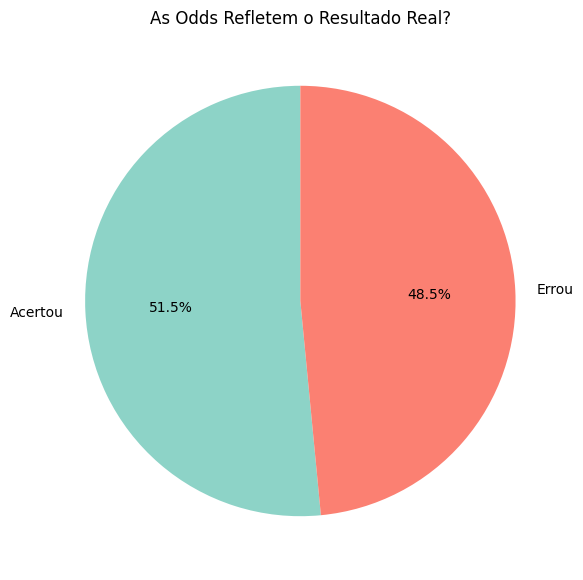

In [60]:
# contagem de acertos e erros
acertos = df['Acerto'].value_counts().rename({True: 'Acertou', False: 'Errou'})

plt.figure(figsize=(6, 6))
plt.pie(acertos, labels=acertos.index, autopct='%1.1f%%', colors=['#8dd3c7', '#fb8072'], startangle=90)
plt.title('As Odds Refletem o Resultado Real?')
plt.tight_layout()
plt.show()

O gráfico de pizza acima mostrou que nossa hipotese não é verdadeira, pois por mais que as odds acertaram o resultado final da partida em cerca de 51,5% dos jogos, enquanto erraram em 48,5%, a baixa diferença de apenas 3% indica que a tendência é muito baixa, ou seja, as odds não são boas previsoras com confiança estatística relevante, elas têm um desempenho ligeiramente melhor, mas insuficiente para afirmar que são previsoras eficientes.

Portanto, concluímos que as odds não refletem com precisão confiável o resultado final da partida.

# Hipótese 2

Pra verificar essa hipótese, entendo que é necessário calcular a diferença entre as odds dos times, porque quanto maior a diferença, mais claro o “favoritismo”, por exemplo, um time com odd 1.50 contra outro com odd 7.00 indica grande favoritismo.

In [61]:
df['maior_odd'] = df[['PH', 'PD', 'PA']].max(axis=1)
df['menor_odd'] = df[['PH', 'PD', 'PA']].min(axis=1)
df['diferenca_odds'] = df['maior_odd'] - df['menor_odd']

Depois, pra facilitar a análise eu categorizei a difernça em 5 níveis, de muito baixa a muito alta:





In [62]:
bins = [0, 0.5, 1.5, 3, 6, 30]  # você pode ajustar esses intervalos
labels = ['Muito baixa', 'Baixa', 'Média', 'Alta', 'Muito alta']
df['faixa_diferenca'] = pd.cut(df['diferenca_odds'], bins=bins, labels=labels)

Por fim, vendo se a taxa de acerto aumenta com a diferença:

In [63]:
acertos_por_faixa = df.groupby('faixa_diferenca', observed=True)['Acerto'].mean().reset_index()
acertos_por_faixa['acerto_percentual'] = acertos_por_faixa['Acerto'] * 100

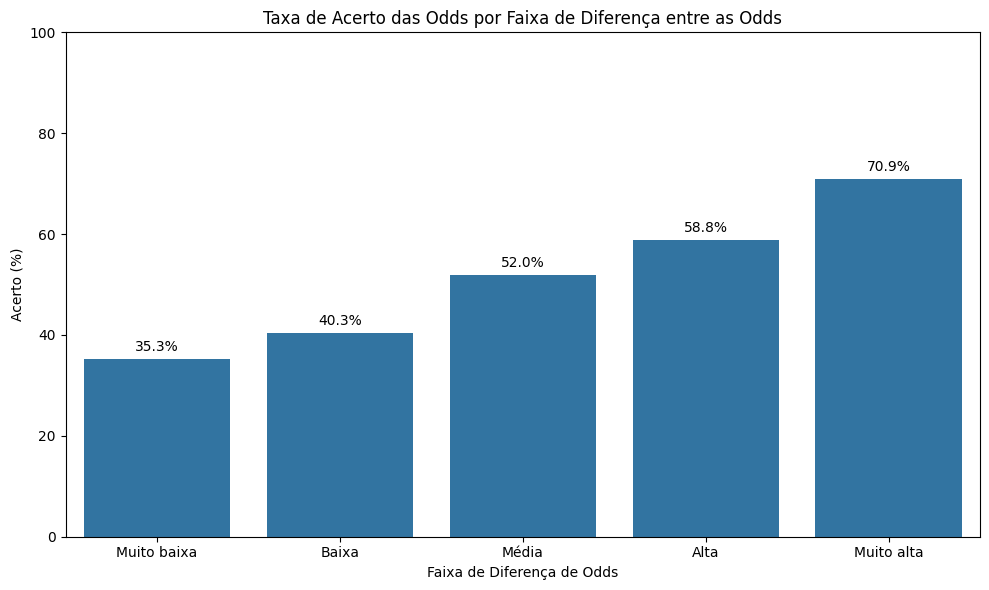

In [64]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=acertos_por_faixa, x='faixa_diferenca', y='acerto_percentual')
for p in ax.patches:
    altura = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, altura + 1, f'{altura:.1f}%',
            ha='center', va='bottom', fontsize=10)

plt.title('Taxa de Acerto das Odds por Faixa de Diferença entre as Odds')
plt.ylabel('Acerto (%)')
plt.xlabel('Faixa de Diferença de Odds')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

O gráfico acima então nos mostra uma relação bem clara entre a diferença das odds e a previsão do resultado do jogo, vemos que quando as odds estão muito próximas, ou seja, quando não há um favorito evidente, a taxa de acerto das apostas é baixa, em torno de 35%, mostrando que esses jogos são mais imprevisíveis quanto ao resultado final. À medida que a diferença entre as odds aumenta, indicando um favoritismo mais claro de um dos times, a taxa de acerto também sobe consideravelmente, ultrapassando os 70% nas situações de maior desequilíbrio.

Então nossa segunda hipótese está confirmada, os jogos com odds muito diferentes tendem, sim, a ter resultados mais previsíveis com as casas de apostas acertando mais quando há um favorito claro.

# Hipótese 3

A terceira hipótese busca entender se, ao longo das partidas analisadas, a vitória do mandante ocorre com maior frequência em comparação com empates e vitórias do visitante. Essa análise pode confirmar ou não a ideia comum de que jogar em casa oferece uma vantagem significativa.

Pra isso, primeiro eu fiz uma contade de quantas vezes isso ocorreu

In [65]:
contagem_resultados = df['Resultado'].value_counts()
print(contagem_resultados)

Resultado
Vitória_Mandante     2028
Empate               1129
Vitória_Visitante    1012
Name: count, dtype: int64


E visualmente a impressão inicial é de que a hipótese se confirma, mas isso não é sufieciente.

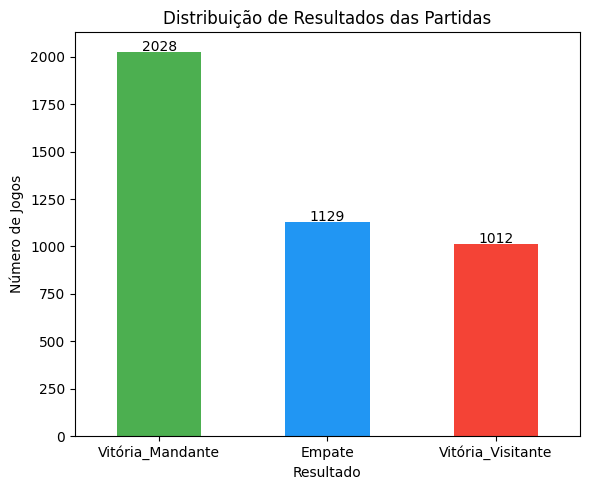

In [66]:
plt.figure(figsize=(6, 5))
contagem_resultados.plot(kind='bar', color=['#4CAF50', '#2196F3', '#F44336'])
plt.title("Distribuição de Resultados das Partidas")
plt.ylabel("Número de Jogos")
plt.xlabel("Resultado")
plt.xticks(rotation=0)
for i, valor in enumerate(contagem_resultados):
    plt.text(i, valor + 5, str(valor), ha='center')
plt.tight_layout()
plt.show()

Pra uma real análise o correto seria verificar a média realtiva pelo total de jogos.

In [67]:
proporcao_resultados = (contagem_resultados / contagem_resultados.sum()) * 100

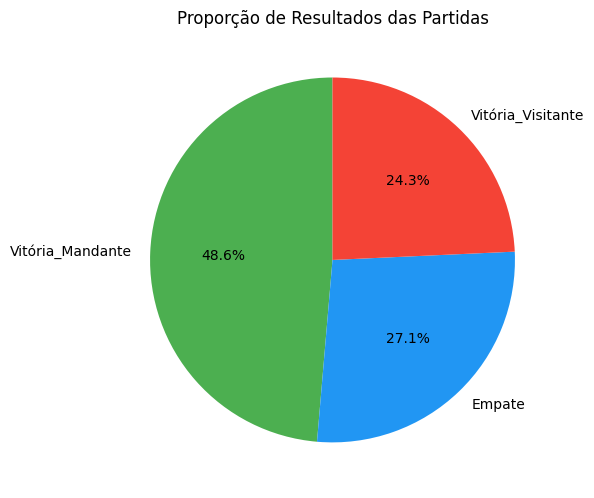

In [68]:
plt.figure(figsize=(6, 6))
proporcao_resultados.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#2196F3', '#F44336'])
plt.title("Proporção de Resultados das Partidas")
plt.ylabel('')
plt.tight_layout()
plt.show()

E com uma análise clusterizada temos que:

In [69]:
df['vitoria_mandante'] = df['Resultado'] == 'Vitória_Mandante'
vitorias = df['vitoria_mandante'].sum()
total_jogos = df['vitoria_mandante'].count()
percentual_vitorias = (vitorias / total_jogos) * 100

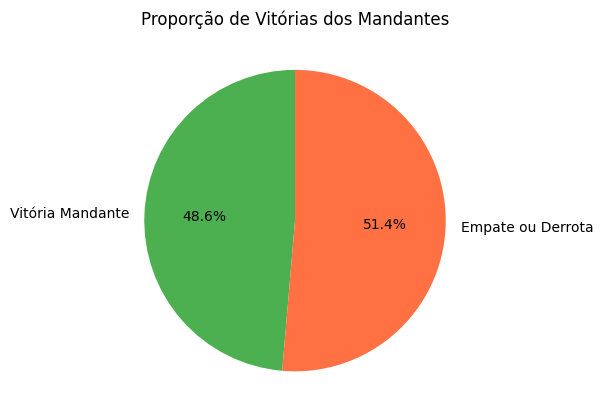

In [70]:
dados = [vitorias, total_jogos - vitorias]
labels = ['Vitória Mandante', 'Empate ou Derrota']
colors = ['#4CAF50', '#FF7043']
plt.figure(figsize=(6, 6))
plt.pie(dados, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Proporção de Vitórias dos Mandantes")
plt.tight_layout()
plt.show()

A análise completa dessa hipótese mostra que mesmo que os times mandantes realmente percam menos (apenas 24,3% das partidas resultam em vitória do visitante - grafico 2 desse tópico) e vençam quase metade dos jogos (48,6%), ainda assim a maioria das partidas (51,4%) termina em empate ou derrota para o mandante. Isso evidencia um cenário mais equilibrado do que favorável pra vitórias e indica que o fator mandante não garante uma vantagem.

Então apesar de os mandantes vencerem mais do que qualquer outro resultado individualmente, quando consideramos em conjunto os empates e as derrotas, vemos que os mandantes não tem a maioria absoluta das vitórias. Portanto, a hipótese de que os mandantes têm uma vantagem histórica clara não se confirma.

# Hipótese 4

Nesta hipótese, vou investigar se o Flamengo, maior clube do Brasil, incontestávelmente, conhecido por sua descomunal força jogando no Maracanã, é o time que mais transforma o favoritismo das casas de apostas em vitórias como mandante.

Primeiro, fiz a coluna favorito, para garantir o time com menor odd, e filtrei os jogos em que o mandante era favorito e venceu.

In [71]:
df['Favorito'] = df[['PH', 'PD', 'PA']].idxmin(axis=1)
df_favorito_mandante = df[df['Favorito'] == 'PH']
vitorias_como_favorito = df_favorito_mandante[df_favorito_mandante['Resultado'] == 'Vitória_Mandante']

Então, contei quantas vezes cada time venceu, selecionando os 10 com mais vitórias.

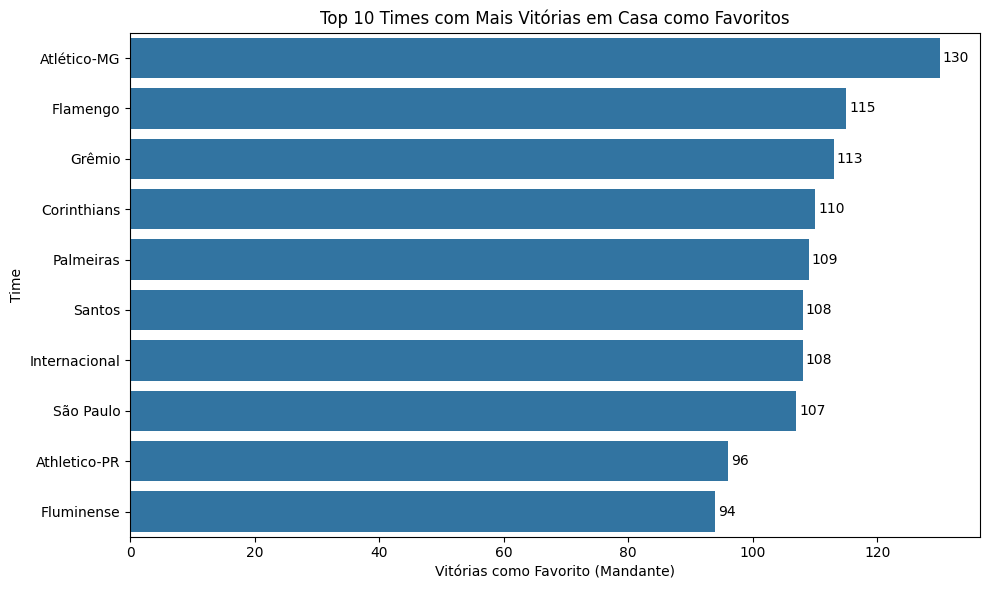

In [72]:
vitorias_por_time = vitorias_como_favorito['Home'].value_counts().reset_index()
vitorias_por_time.columns = ['Time', 'Vitorias_como_favorito']
vitorias_por_time = vitorias_por_time.sort_values(by='Vitorias_como_favorito', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=vitorias_por_time.head(10), x='Vitorias_como_favorito', y='Time')
plt.title('Top 10 Times com Mais Vitórias em Casa como Favoritos')
plt.xlabel('Vitórias como Favorito (Mandante)')
plt.ylabel('Time')
for i, row in vitorias_por_time.head(10).iterrows():
    plt.text(row['Vitorias_como_favorito'] + 0.5, i, row['Vitorias_como_favorito'], va='center')
plt.tight_layout()
plt.show()

Mesmo o Flamengo aparecendo em segundo no número absoluto de vitórias em casa como favorito, precisamos entender a porcentagem em relação aos jogos totais que aconteceram do time no cenário proposto.

Para isso, fiz o número de vitórias como mandante, dividido pelo número de jogos em que o time era mandante.

In [73]:
df['Favorito'] = df[['PH', 'PD', 'PA']].idxmin(axis=1)
df_favorito_mandante = df[df['Favorito'] == 'PH']
vitorias_como_favorito = df_favorito_mandante[df_favorito_mandante['Resultado'] == 'Vitória_Mandante']
taxa_conversao = (
    vitorias_como_favorito.groupby('Home').size()
    / df_favorito_mandante.groupby('Home').size()
)
df_taxa = taxa_conversao.reset_index(name='Taxa_Conversao').dropna()
df_taxa = df_taxa.sort_values(by='Taxa_Conversao', ascending=False)
top_times = df_taxa.head(10)

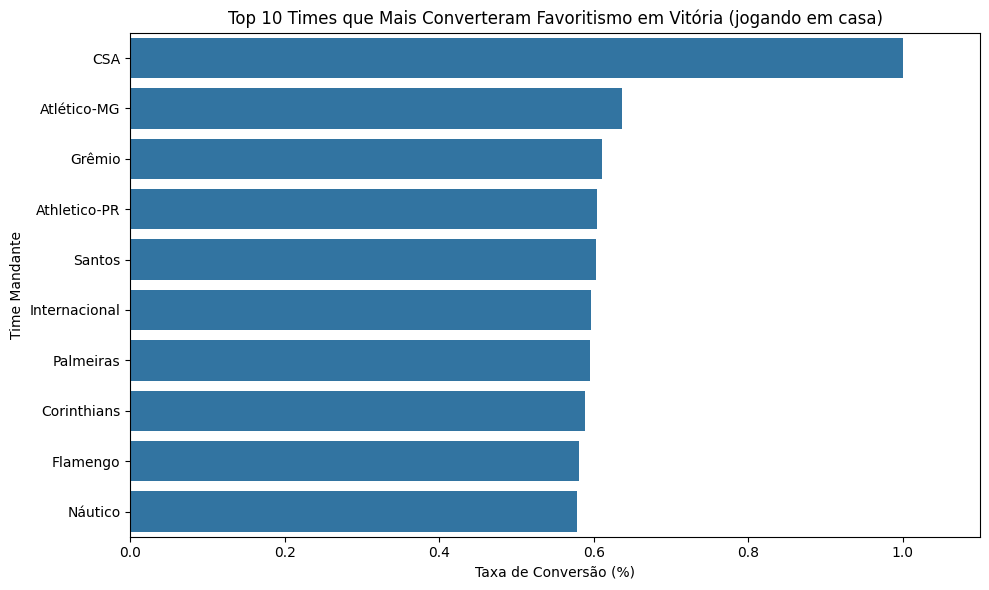

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_times, x='Taxa_Conversao', y='Home')
plt.title('Top 10 Times que Mais Converteram Favoritismo em Vitória (jogando em casa)')
plt.xlabel('Taxa de Conversão (%)')
plt.ylabel('Time Mandante')
plt.xlim(0, 1.1)
plt.tight_layout()
plt.show()

Assim, concluímos que mesmo que em números absolutos o Flamengo seja o segundo com mais vitórias como mandante em partidas que ele era favorito, percentualmente ele fica apenas na nona posição, o que não muda em nada os elogios feitos ao time, mas invalida a hipótese levantada.

# Conclusão

A análise exploratória dos dados das partidas da Série A do Campeonato Brasileiro, com foco nas odds fornecidas por casas de apostas e nos resultados dos jogos trouxe informações imporantes e nos deixou as hipóteses levantadas.

A Hipótese 1 não foi confirmada já que os dados mostraram que as odds acertaram o resultado final em cerca de 51,5% das partidas. Embora esse percentual seja levemente superior ao número de erros (48,5%), a diferença é pequena, o que revela que as odds não são uma previsão exata ou seja, elas até conseguem captar um leve favoritismo antes do jogo, mas não garantem precisão nos resultados, especialmente em um esporte imprevisível como o futebol.

A Hipótese 2 entretanto é verdadeira, pois a análise por faixas de diferença entre odds mostrou que, quanto maior a diferença entre as odds, maior a taxa de acerto da previsão. Na faixa “muito alta”, por exemplo, a taxa de acerto chegou a mais de 70%, enquanto nas faixas de diferença baixa esse valor ficou abaixo de 40%. Isso indica que grandes discrepâncias entre as odds realmente refletem um favoritismo mais claro e aumentam a possibilidade de acerto do resultado final.

A Hipótese 3 é falsa, pois vimos que os times mandantes vencem 48,6% das partidas, o que é mais que qualquer outro resultado isolado como empate ou vitória do visitante, mas quando agrupamos empate e derrota, ou seja, quando o mandante não vence, esse número soma 51,4%, superando as vitórias em casa. Isso mostra que, embora jogar em casa traga certo bons números de vitória, essa vantagem não é majoritária se considerarmos todos os resultados.

Por fim, a Hipótese 4 também é falsa, pois vimos que o Time que mais possui vitórias em números absolutos como mandante e favorito pelas odds é o Atlético-MG e, percentualmente, é o CSA.